In [46]:
import time
import librosa
from dtw import dtw
import librosa.display
from scipy.spatial.distance import cdist
import numpy
import IPython.display as ipd

In [47]:
y1, sr1 = librosa.load('./sounds/10.wav')
y2, sr2 = librosa.load('./sounds/78.wav')
'''
y is np.ndarray [shape=(n,) or (…, n)] means audio time series. Multi-channel is supported.
sr is number > 0 [scalar] means sampling rate of y 这个东西可以在load里自己指定
'''
print(y1)
print(sr1)

[9.4022398e-05 2.0963105e-04 4.1270917e-04 ... 1.2247091e-03 1.2574189e-03
 9.0253411e-04]
22050


In [48]:
x, sr = librosa.load('./sounds/10.wav')
ipd.Audio(x, rate=sr)

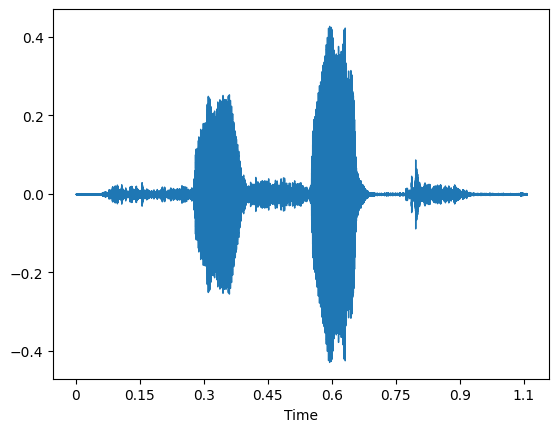

In [49]:
# 这里可能会出现版本不合适的情况，可以参考
# https://blog.csdn.net/xuchaoxin1375/article/details/129539100
import matplotlib.pyplot as plt
librosa.display.waveshow(x)
plt.show()

[[-5.40653625e+02 -5.28476807e+02 -4.91772308e+02 -4.36835327e+02
  -3.99589386e+02 -3.87119385e+02 -3.96279144e+02 -4.12735565e+02
  -4.16347473e+02 -4.08719025e+02 -3.83586182e+02 -3.14703094e+02
  -2.54236755e+02 -2.40448822e+02 -2.65630920e+02 -2.70484772e+02
  -2.81445923e+02 -2.96463287e+02 -2.96132263e+02 -2.94560730e+02
  -2.95759827e+02 -2.99140930e+02 -3.05325806e+02 -2.95354156e+02
  -2.98978180e+02 -2.95985413e+02 -2.78801270e+02 -2.37115356e+02
  -2.30729141e+02 -2.96374023e+02 -4.48132111e+02 -4.87794769e+02
  -4.63175903e+02 -3.65800537e+02 -3.03786896e+02 -3.06188202e+02
  -3.37967316e+02 -3.52457489e+02 -3.69713959e+02 -3.90849121e+02
  -4.30572876e+02 -4.78563293e+02 -4.84459381e+02 -4.86183990e+02
  -4.80663086e+02 -4.83427155e+02]
 [ 3.90607262e+01  4.74466934e+01  3.98742714e+01  4.95682564e+01
   6.16821976e+01  6.38646469e+01  5.38930969e+01  4.63053970e+01
   4.65252304e+01  4.60875778e+01  6.06487007e+01  1.23327141e+02
   1.49179108e+02  1.45629669e+02  1.2850

/tmp/ipykernel_40295/1430311397.py:5: FutureWarning: Pass y=[9.4022398e-05 2.0963105e-04 4.1270917e-04 ... 1.2247091e-03 1.2574189e-03
 9.0253411e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc1 = librosa.feature.mfcc(y1, sr1)


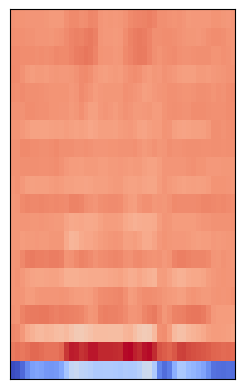

In [50]:
plt.subplot(1, 2, 1)
'''
Mel-frequency cepstral coefficients (MFCCs)
'''
mfcc1 = librosa.feature.mfcc(y1, sr1)
print(mfcc1)
librosa.display.specshow(mfcc1)

In [51]:
y1, sr1 = librosa.load('./train/fcmc0-a1-t.wav')
y2, sr2 = librosa.load('./train/fcmc0-b1-t.wav')

In [52]:
x, sr = librosa.load('./train/fcmc0-a1-t.wav')
ipd.Audio(x, rate=sr)

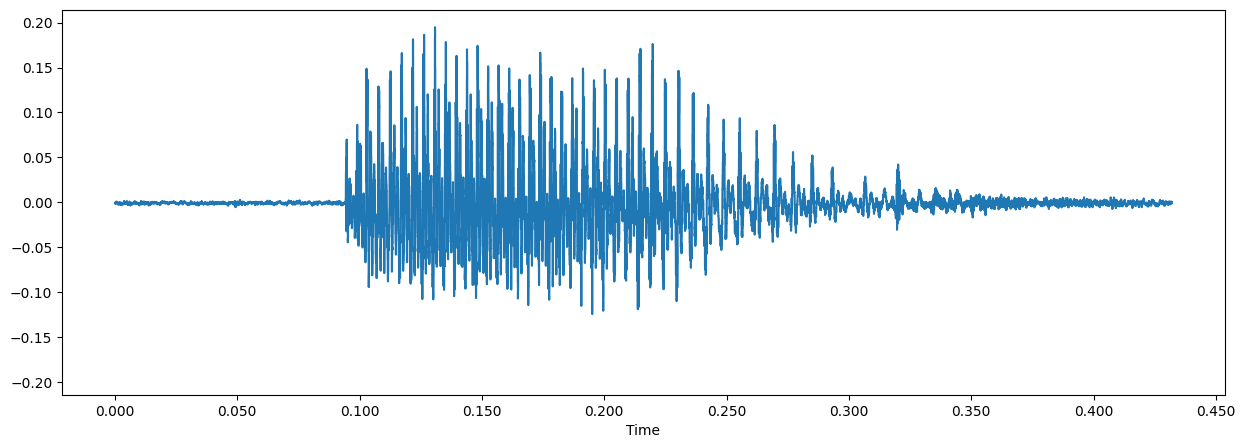

In [53]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(x, sr=sr)

/tmp/ipykernel_40295/2949637652.py:2: FutureWarning: Pass y=[-0.00062645 -0.00082045 -0.00111267 ... -0.00128585 -0.00055499
  0.        ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc1 = librosa.feature.mfcc(y1, sr1)


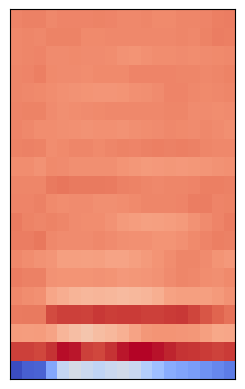

In [54]:
plt.subplot(1, 2, 1)
mfcc1 = librosa.feature.mfcc(y1, sr1)
librosa.display.specshow(mfcc1)

In [55]:
x, sr = librosa.load('./train/fcmc0-b1-t.wav')
ipd.Audio(x, rate=sr)

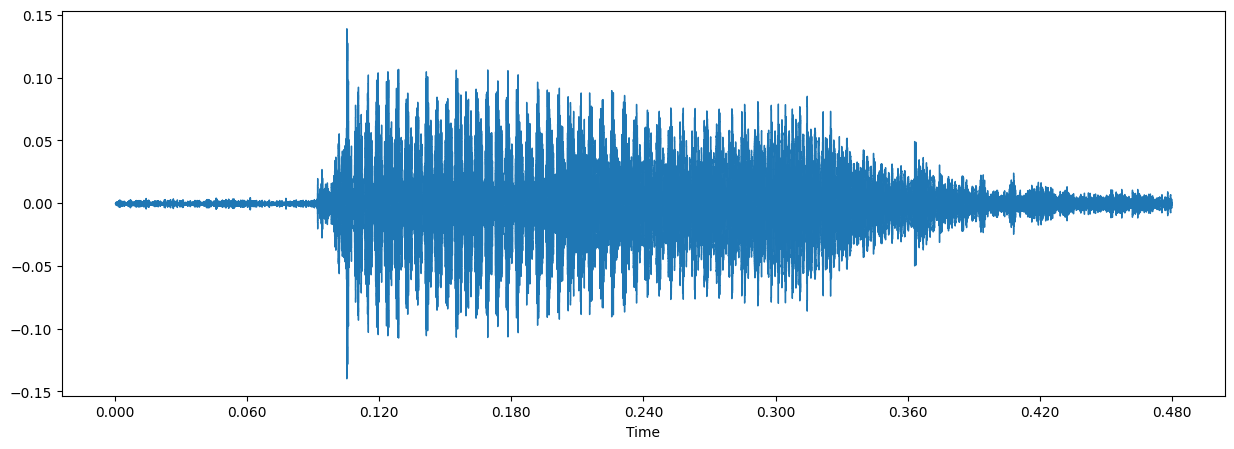

In [56]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(x, sr=sr)

/tmp/ipykernel_40295/1120894488.py:3: FutureWarning: Pass y=[ 2.6165799e-05  1.9671489e-04 -5.5833480e-05 ... -7.2370365e-04
  5.4685926e-05  5.1403081e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc2 = librosa.feature.mfcc(y2, sr2)


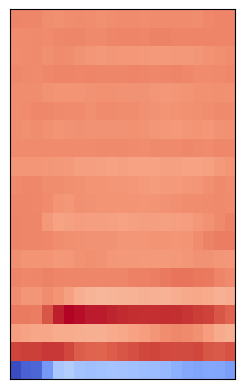

In [57]:
# 其实这个subplot没啥用，感觉主要是后面的要用
plt.subplot(1, 2, 2)
mfcc2 = librosa.feature.mfcc(y2, sr2)
librosa.display.specshow(mfcc2)

/tmp/ipykernel_40295/2020189768.py:2: FutureWarning: Pass y=[-0.00062645 -0.00082045 -0.00111267 ... -0.00128585 -0.00055499
  0.        ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc1 = librosa.feature.mfcc(y1, sr1)
/tmp/ipykernel_40295/2020189768.py:6: FutureWarning: Pass y=[ 2.6165799e-05  1.9671489e-04 -5.5833480e-05 ... -7.2370365e-04
  5.4685926e-05  5.1403081e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc2 = librosa.feature.mfcc(y2, sr2)


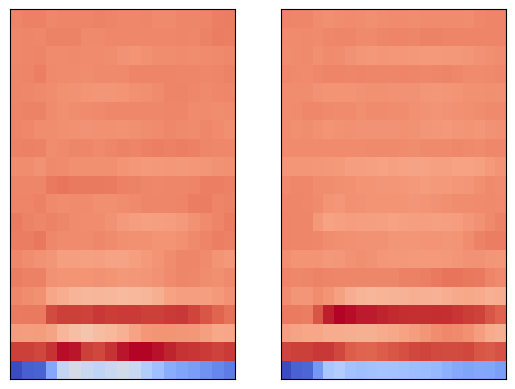

In [58]:
plt.subplot(1, 2, 1)
mfcc1 = librosa.feature.mfcc(y1, sr1)
librosa.display.specshow(mfcc1)

plt.subplot(1, 2, 2)
mfcc2 = librosa.feature.mfcc(y2, sr2)
librosa.display.specshow(mfcc2)

In [59]:
# Calculate 計算兩個樣本音頻 " a  " 和 " b " 之間的DTW  
from scipy.linalg import norm
# 我是用的python3.9 这里源码里没有norm就运行不了
# https://blog.csdn.net/qq_40206371/article/details/122644736 这个是解释dtw的，我的感觉就是这个函数就是算两个矩阵之间的距离的
dist, cost, path, _ = dtw(mfcc1.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
print('Normalized distance between the two sounds:', dist)   

Normalized distance between the two sounds: 141.53201847076417


In [60]:
import os
dirname = "train"
files = [f for f in os.listdir(dirname) if not f.startswith('.')]
print(files)

['mnjh0-b1-t.wav', 'mrmh1-a1-t.wav', 'mnjh0-a1-t.wav', 'msa0-b1-t.wav', 'fme0-a1-t.wav', 'fcmc0-b1-t.wav', 'mjp0-b1-t.wav', 'mrmh1-b1-t.wav', 'fmbd0-a1-t.wav', 'fmb0-a1-t.wav', 'mtdw0-b1-t.wav', 'fmb0-b1-t.wav', 'mtdw0-a1-t.wav', 'msa0-a1-t.wav', 'frw0-a1-t.wav', 'frw0-b1-t.wav', 'mnre0-a1-t.wav', 'fews0-a1-t.wav', 'mjp0-a1-t.wav', 'mnre0-b1-t.wav', 'fmbd0-b1-t.wav', 'fcmc0-a1-t.wav', 'fme0-b1-t.wav', 'fews0-b1-t.wav']


In [102]:
# 这段代码的作用是计算音频文件之间的距离，并生成一个距离矩阵。
# start = time.clock()
import numpy as np
start = time.perf_counter() 
minval = 200
distances = np.ones((len(files), len(files)))
y = np.ones(len(files))

for i in range(len(files)):
    y1, sr1 = librosa.load(dirname+"/"+files[i])
    mfcc1 = librosa.feature.mfcc(y=y1, sr=sr1)
    for j in range(len(files)):
        y2, sr2 = librosa.load(dirname+"/"+files[j])
        mfcc2 = librosa.feature.mfcc(y=y2, sr=sr2)
        dist, _, _, _ = dtw(mfcc1.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
#         print files[i],mfcc1.T[0][0],mfcc2.T[0][0],files[j],dist
#         if dist<minval:
#             minval = dist
        distances[i,j] = dist
    if i%2==0:
        y[i] = 0  #'a'
    else:
        y[i] = 1  #'b'
print("Time used: {}s".format(time.perf_counter() -start))

Time used: 19.301375593990088s


In [62]:
distances[0] # A dict

array([  0.        , 162.2784738 , 158.7048708 ,  97.38896288,
       145.491783  , 158.9862674 , 114.81932037, 138.93832986,
       207.09553851, 131.06242371, 137.49488429, 134.83845403,
       207.58057719, 148.50907822, 159.44383607, 140.98742646,
       128.86666606, 157.76501408, 148.34011007, 108.08809779,
       135.65864576, 176.05868594, 155.54766169, 125.58281737])

In [115]:
#a = 155.156
#b = 184.702
#c = 158.231
label = ['a','b']
print(distances.shape)
# 也就是说我让他们两两之间都算一个差距出来，生成一个向量，然后这个向量作为分类的依据，感觉有点离谱，效果比较拉胯反正

(24, 24)


In [103]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
# 说白了这个就是给一个特征向量，然后给一个label去预测
classifier.fit(distances, y)

KNeighborsClassifier(metric='euclidean')

In [109]:
y, sr = librosa.load('test/farw0-b1-t.wav')
mfcc = librosa.feature.mfcc(y = y, sr = sr)
distanceTest = []
for i in range(len(files)):
    y1, sr1 = librosa.load(dirname+"/"+files[i])
    mfcc1 = librosa.feature.mfcc(y = y1, sr = sr1)
    dist, _, _, _ = dtw(mfcc.T, mfcc1.T, dist=lambda x, y: norm(x - y, ord=1))
    distanceTest.append(dist)

In [110]:
dist

165.34302616119385

In [111]:
# pre = classifier.predict(distanceTest)[0] # 否 - False
pre = classifier.predict([distanceTest])[0]
print(pre)

1.0


In [112]:
label[int(pre)]

'b'

In [113]:
print("Predict audio is: '{}'".format(label[int(pre)]))

Predict audio is: 'b'
